## MATH 6266 Project
### Name: Juzar Heera
### GT ID: 903764693

In [2]:
# Importing the essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
from math import sqrt

In [3]:
# Loading the given dataset
df = pd.read_csv("zillowcleanedup.csv")
df.head()

,House,Selling_price,Zip_code,Formal_Date,beds,bath,House_type,sqft,year_built,last_sold_price,last_sold_date,Zestimate
0,1,48800,30310,2012.0531,2,2.0,Ranch home,1188,@1950,7400,2011.0719,32412
1,2,42000,30310,2014.0805,3,3.0,Ranch home,1352,@1956,7000,2011.1227,54362
2,3,60000,30310,2013.1113,3,1.0,single family,1050,@1950,108000,2007.0613,53873
3,4,36000,30310,2014.1118,3,1.5,single family,1131,@1962,36000,2008.1210,52829
4,5,25000,30310,2014.1016,3,2.0,single family,1110,@1920,25000,2008.0611,64275


Text(0.5, 1.0, 'Selling Price vs Sqft')

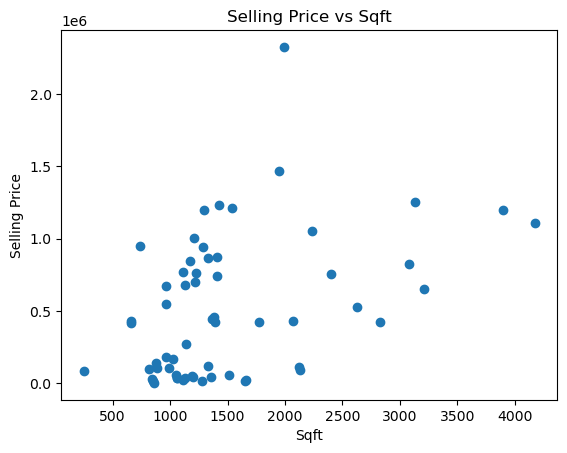

In [4]:
plt.scatter(x = df["sqft"], y = df["Selling_price"])
plt.xlabel("Sqft")
plt.ylabel("Selling Price")
plt.title("Selling Price vs Sqft")

In [5]:
model_all = smf.ols(formula= "Selling_price ~ sqft", data = df).fit()
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_price   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     12.57
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           0.000783
Time:                        11:20:14   Log-Likelihood:                -864.25
No. Observations:                  60   AIC:                             1733.
Df Residuals:                      58   BIC:                             1737.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.17e+05   1.25e+05      0.939      0.3

In [6]:
# Selecting only single family homes to use in this project.
df_single_family_homes = df[df["House_type"]=='single family']
df_single_family_homes["Zip_code"].unique()

array([30310, 30309, 94043], dtype=int64)

In [7]:
colors = {30310:'r',30309:'g',94043:'b'}
df_single_family_homes['color'] = df_single_family_homes["Zip_code"].apply(lambda x: colors[x])
df_single_family_homes.head()

C:\Users\Juzar\AppData\Local\Temp\ipykernel_10208\1779319556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_family_homes['color'] = df_single_family_homes["Zip_code"].apply(lambda x: colors[x])


,House,Selling_price,Zip_code,Formal_Date,beds,bath,House_type,sqft,year_built,last_sold_price,last_sold_date,Zestimate,color
2,3,60000,30310,2013.1113,3,1.0,single family,1050,@1950,108000,2007.0613,53873,r
3,4,36000,30310,2014.1118,3,1.5,single family,1131,@1962,36000,2008.1210,52829,r
4,5,25000,30310,2014.1016,3,2.0,single family,1110,@1920,25000,2008.0611,64275,r
5,6,38000,30310,2014.1008,2,1.0,single family,1060,@1948,31000,2008.0903,39763,r
9,10,14000,30310,2014.1002,2,1.0,single family,850,@1949,72000,1999.0708,41814,r


Text(0.5, 1.0, 'Selling Price vs Sqft for Single Family Homes')

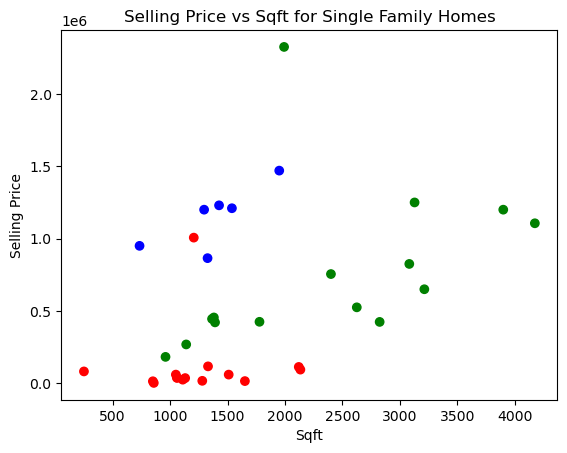

In [8]:
plt.scatter(x = df_single_family_homes["sqft"], y = df_single_family_homes["Selling_price"],c = df_single_family_homes["color"])
plt.xlabel("Sqft")
plt.ylabel("Selling Price")
plt.title("Selling Price vs Sqft for Single Family Homes")
#plt.savefig("sf_allzips.png")

# Linear Regression (by hand)

We want to run a linear regression model to predict the selling price based on the square footage of the single family home for each zipcode. We will start by defining the following model:
$$Y_{i} = \beta^{sqft} \cdot X^{sqft}_{i} + \alpha + \epsilon_{i}$$
where $Y_{i}$ is the selling price, $X^{sqft}_{i}$ is the corresponding area of the house in square feet and $\alpha$ is the intercept.

We can rewrite our model as follows:
$$\vec{Y} = \mathbf{X}\begin{bmatrix}\beta^{sqft} \\ \alpha\end{bmatrix} + \vec{E}, \hspace{5mm} \mathbf{X} = \begin{bmatrix}\vec{X}^{sqft} & \vec{1}\end{bmatrix} \text{ and } \vec{E} = \begin{bmatrix}\epsilon_{1} \\ \vdots \\ \epsilon_{n} \end{bmatrix}$$

Then, we want to minimize the squared error to calculate our least-squares estimate of the coefficients, $\hat{\beta}^{sqft}$ and $\hat{\alpha}$, through the following formula: 
$$\begin{bmatrix}\hat{\beta}^{sqft} \\ \hat{\alpha}\end{bmatrix} = \left(\mathbf{X}^{T}\mathbf{X}\right)^{-1}\mathbf{X}^{T}\vec{Y}$$

To determine whether the values of $\hat{\beta}^{sqft}$ and $\hat{\alpha}$ are statistically significant, we need to run a statistical test and calculate the p-values. However, we need the variance of the errors $\epsilon_{i}$'s which we are not given. So, we will first find the unbiased estimator of the variance of the errors.

$$
\begin{align*}
\hat{\sigma}_{UB}^{2} &= \frac{\sum_{i=1}^{n}\left(y_{i} - \hat{\beta}^{sqft} \cdot x^{sqft}_{i} - \hat{\alpha}\right)^{2}}{n-2} \\
&= \frac{\left(\vec{Y} - \mathbf{X} \cdot \begin{bmatrix}\hat{\beta}^{sqft} \\ \hat{\alpha}\end{bmatrix}\right)^{T}\left(\vec{Y} - \mathbf{X} \cdot \begin{bmatrix}\hat{\beta}^{sqft} \\ \hat{\alpha}\end{bmatrix}\right)}{n-2}
\end{align*}
$$

After obtaining the $\hat{\sigma}_{UB}^{2}$, we can now proceed to calculate the variances of our estimated coefficients $\hat{\beta}^{sqft}$ and $\hat{\alpha}$.  

$$
\begin{align*}
\begin{bmatrix}\hat{\beta}^{sqft} \\ \hat{\alpha}\end{bmatrix} &= \left(\mathbf{X}^{T}\mathbf{X}\right)^{-1}\mathbf{X}^{T}\left(\mathbf{X}\begin{bmatrix}\beta^{sqft} \\ \alpha\end{bmatrix} + \vec{E}\right) \\
&= \begin{bmatrix}\beta^{sqft} \\ \alpha\end{bmatrix} + \left(\mathbf{X}^{T}\mathbf{X}\right)^{-1}\mathbf{X}^{T}\vec{E}
\end{align*}
$$

Let $\left(\mathbf{X}^{T}\mathbf{X}\right)^{-1}\mathbf{X}^{T} = \begin{bmatrix}\vec{x}_{1} \\ \vec{x}_{2}\end{bmatrix}$ where $\vec{x}_{1}$ and $\vec{x}_{2}$ are the row vectors representing first and second row of the matrix $\left(\mathbf{X}^{T}\mathbf{X}\right)^{-1}\mathbf{X}^{T}$.

$$
\begin{align*}
\begin{bmatrix}\hat{\beta}^{sqft} \\ \hat{\alpha}\end{bmatrix} &= \begin{bmatrix}\beta^{sqft} \\ \alpha\end{bmatrix} + \left(\mathbf{X}^{T}\mathbf{X}\right)^{-1}\mathbf{X}^{T}\vec{E} \\
&= \begin{bmatrix}\beta^{sqft} \\ \alpha\end{bmatrix} + \begin{bmatrix}\vec{x}_{1} \\ \vec{x}_{2}\end{bmatrix}\vec{E} \\
\implies \begin{bmatrix}\sigma_{\hat{\beta}^{sqft}} \\ \sigma_{\hat{\alpha}}\end{bmatrix} &=
\begin{bmatrix} \sqrt{\vec{x}_{1}  \vec{x}_{1}^{T}} \cdot \sqrt{\hat{\sigma}_{UB}^{2}} \\ \sqrt{\vec{x}_{2} \vec{x}_{2}^{T}}\cdot \sqrt{\hat{\sigma}_{UB}^{2}}\end{bmatrix} 
\end{align*}
$$

Lastly, we run a T-test with the null hypothesis that the true $\beta^{sqft}$ and $\alpha$ are zero and degree of freedom is $\left(n-2\right)$. We use the T-table to find the p-value of the coefficients $\hat{\beta}^{sqft}$ and $\hat{\alpha}$. If the p-value is less than 0.05, then we can reject the null hypothesis and conclude that we can indeed include the effect of square footage and the intercept into our model.

$$
\begin{align*}
H_{0}: \beta^{sqft} &= 0 \\ \alpha &= 0 \\
\text{p-value for }\hat{\beta}^{sqft} &= P\left(T^{n-2} \ge \frac{\hat{\beta}^{sqft}}{\sigma_{\hat{\beta}^{sqft}}}\right) \\
\text{p-value for }\hat{\alpha} &= P\left(T^{n-2} \ge \frac{\hat{\alpha}}{\sigma_{\hat{\alpha}}}\right)
\end{align*}
$$

## Zip Code: 30310
In this section, we will run the steps required to do the linear regression by hand for the single family home located in 30310. 

Text(0.5, 1.0, 'Selling Price vs Sqft for Single Family Homes in 30310')

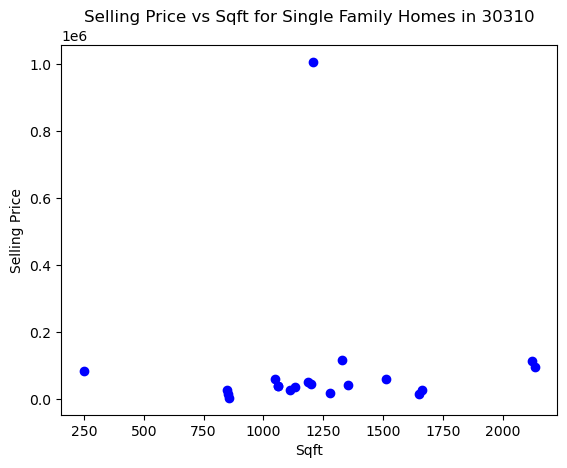

In [11]:
# Visualize the data of selling price vs sqft for single family homes in zip code 30310.
df_single_family_homes_30310 = df[df["Zip_code"] == 30310]
plt.scatter(x = df_single_family_homes_30310["sqft"], y = df_single_family_homes_30310["Selling_price"], color = 'blue')
plt.xlabel("Sqft")
plt.ylabel("Selling Price")
plt.title("Selling Price vs Sqft for Single Family Homes in 30310")
#plt.savefig("sf_30310.png")

In [12]:
# Forming the X matrix and Y vector.
n_30310 = len(df_single_family_homes_30310["sqft"])
X_30310_sqft = df_single_family_homes_30310["sqft"].to_numpy().reshape((n_30310,1))
X_30310_ones = np.ones(n_30310).reshape((n_30310,1))
X_30310 = np.concatenate((X_30310_sqft,X_30310_ones),axis = 1)
print("Size of our data matrix : ", X_30310.shape, "\nX:\n", X_30310)
Y_30310 = df_single_family_homes_30310["Selling_price"].to_numpy().reshape((n_30310,1))
print("\nY:\n",Y_30310)

Size of our data matrix :  (20, 2) 
X:
 [[1.188e+03 1.000e+00]
 [1.352e+03 1.000e+00]
 [1.050e+03 1.000e+00]
 [1.131e+03 1.000e+00]
 [1.110e+03 1.000e+00]
 [1.060e+03 1.000e+00]
 [1.200e+03 1.000e+00]
 [8.460e+02 1.000e+00]
 [1.662e+03 1.000e+00]
 [8.500e+02 1.000e+00]
 [1.651e+03 1.000e+00]
 [2.120e+03 1.000e+00]
 [1.330e+03 1.000e+00]
 [1.280e+03 1.000e+00]
 [1.206e+03 1.000e+00]
 [1.060e+03 1.000e+00]
 [2.134e+03 1.000e+00]
 [8.580e+02 1.000e+00]
 [1.510e+03 1.000e+00]
 [2.500e+02 1.000e+00]]

Y:
 [[  48800]
 [  42000]
 [  60000]
 [  36000]
 [  25000]
 [  38000]
 [  45000]
 [  27000]
 [  25000]
 [  14000]
 [  15200]
 [ 113000]
 [ 117000]
 [  17000]
 [1006800]
 [  38000]
 [  94500]
 [   2500]
 [  60000]
 [  82000]]


In [13]:
# Calculating the maximum likelihood estimates for the regression coefficients beta_hat_sqft and alpha_hat.
xtx_inverse_xt_30310 = np.matmul(np.linalg.inv(np.matmul(np.transpose(X_30310), X_30310)),np.transpose(X_30310))
max_likelihood_coeffs_30310 = np.matmul(xtx_inverse_xt_30310,Y_30310)
print("Maximum Likelihood Estimate for Beta Square Foot = ", max_likelihood_coeffs_30310[0][0], 
      "\nMaximum Likelihood Estimate for Alpha = ", max_likelihood_coeffs_30310[1][0])

Maximum Likelihood Estimate for Beta Square Foot =  16.51765033072639 
Maximum Likelihood Estimate for Alpha =  74818.47122910542


Hence, we have the following estimates of the regression coefficients:

$$\begin{bmatrix}\hat{\beta}^{sqft} \\ \hat{\alpha}\end{bmatrix} = \begin{bmatrix} 16.51765033\\74818.47122911 \end{bmatrix} \approx 
\begin{bmatrix} 16.5177\\7.482 \times 10^{4} \end{bmatrix}$$

In [15]:
# Calculating the unbiased estimator for the variance of the errors.
ub_estimator_30310 = np.dot(np.transpose(Y_30310 - np.matmul(X_30310, max_likelihood_coeffs_30310)), 
                            Y_30310 - np.matmul(X_30310, max_likelihood_coeffs_30310)) / (n_30310-2)
print("Unbiased Estimator for Variance of Errors = ", ub_estimator_30310[0][0])

Unbiased Estimator for Variance of Errors =  49624557152.428246


$$\therefore \hat{\sigma}_{UB}^{2} \approx 4.9625 \times 10^{10}$$

In [17]:
# Calculate the standard deviation of our maximum likelihood estimator regression coefficients.
sd_betasqft_30310 = np.sqrt(np.matmul(xtx_inverse_xt_30310[0], np.transpose(xtx_inverse_xt_30310[0])))*np.sqrt(ub_estimator_30310)
sd_alpha_30310 = np.sqrt(np.matmul(xtx_inverse_xt_30310[1], np.transpose(xtx_inverse_xt_30310[1])))*np.sqrt(ub_estimator_30310)
print("Standard Deviation for Beta Square Foot Estimate = ", sd_betasqft_30310[0][0], 
      "\nStandard Deviation Estimate for Alpha Estimate = ", sd_alpha_30310[0][0])

Standard Deviation for Beta Square Foot Estimate =  117.66680829691771 
Standard Deviation Estimate for Alpha Estimate =  154442.61885177987


$$
\begin{align*}
\therefore \begin{bmatrix}\sigma_{\hat{\beta}^{sqft}} \\ \sigma_{\hat{\alpha}}\end{bmatrix} &=
\begin{bmatrix} \sqrt{\vec{x}_{1}  \vec{x}_{1}^{T}} \cdot \sqrt{\hat{\sigma}_{UB}^{2}} \\ \sqrt{\vec{x}_{2} \vec{x}_{2}^{T}}\cdot \sqrt{\hat{\sigma}_{UB}^{2}}\end{bmatrix} \\
&\approx \begin{bmatrix} 117.667 \\ 1.54\times 10^{5}\end{bmatrix}
\end{align*}
$$

In [19]:
# Run the T-test for the coefficients to find their p-values
t_0_betasqft = (max_likelihood_coeffs_30310[0]/sd_betasqft_30310)[0][0]
t_0_alpha = (max_likelihood_coeffs_30310[1]/sd_alpha_30310)[0][0]
print("Test Statistic for Beta Square Foot Estimate = ", t_0_betasqft, 
      "\nTest Statistic for Alpha Estimate = ", t_0_alpha)

Test Statistic for Beta Square Foot Estimate =  0.14037646274084475 
Test Statistic for Alpha Estimate =  0.48444187093790125


$$
\begin{align*}
\text{p-value for }\hat{\beta}^{sqft} &= P\left(T^{n-2} \ge \frac{\hat{\beta}^{sqft}}{\sigma_{\hat{\beta}^{sqft}}}\right) \\
&= P\left(T^{20-2} \ge 0.1404\right) \\
&> 0.25 \hspace{5mm} \text{ from T-table}  \\
\text{p-value for }\hat{\alpha} &= P\left(T^{n-2} \ge \frac{\hat{\alpha}}{\sigma_{\hat{\alpha}}}\right) \\
&= P\left(T^{20-2} \ge 0.4844\right) \\
&> 0.25 \hspace{5mm} \text{ from T-table}
\end{align*}
$$

Since the p-values for both $\hat{\beta}^{sqft}$ and $\hat{\alpha}$ are more than 0.25, i.e. more than 0.05, we cannot reject the null hypothesis that is: 
$$\begin{align*}H_{0}: \beta^{sqft} &= 0 \\ \alpha &= 0 \end{align*}$$ 
Hence, we conclude that we are unable to claim that the square footage or the intercept contribute to the selling price for single family homes located in 30310.

In [21]:
model_30310 = smf.ols(formula= "Selling_price ~ sqft", data = df_single_family_homes_30310).fit()
print(model_30310.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.054
Method:                 Least Squares   F-statistic:                   0.01971
Date:                Mon, 02 Dec 2024   Prob (F-statistic):              0.890
Time:                        11:20:15   Log-Likelihood:                -273.60
No. Observations:                  20   AIC:                             551.2
Df Residuals:                      18   BIC:                             553.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.482e+04   1.54e+05      0.484      0.6

Using the statistics package in Python, we are able to verify that the coefficients, standard deviation of the errors, test statistic and p-values that we calculated for our model are indeed correct.

## Zip Code: 30309
In this section, we will run the steps required to do the linear regression by hand for the single family home located in 30309. 

Text(0.5, 1.0, 'Selling Price vs Sqft for Single Family Homes in 30309')

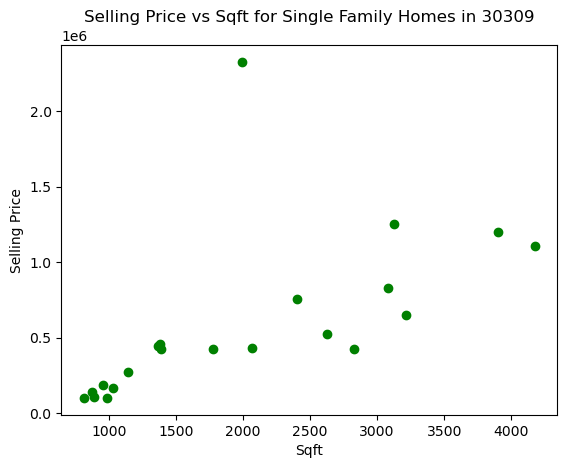

In [24]:
# Visualize the data of selling price vs sqft for single family homes in zip code 30309.
df_single_family_homes_30309 = df[df["Zip_code"] == 30309]
plt.scatter(x = df_single_family_homes_30309["sqft"], y = df_single_family_homes_30309["Selling_price"], color = 'green')
plt.xlabel("Sqft")
plt.ylabel("Selling Price")
plt.title("Selling Price vs Sqft for Single Family Homes in 30309")
#plt.savefig("sf_30309.png")

In [25]:
# Forming the X matrix and Y vector.
n_30309 = len(df_single_family_homes_30309["sqft"])
X_30309_sqft = df_single_family_homes_30309["sqft"].to_numpy().reshape((n_30309,1))
X_30309_ones = np.ones(n_30309).reshape((n_30309,1))
X_30309 = np.concatenate((X_30309_sqft,X_30309_ones),axis = 1)
print("Size of our data matrix : ", X_30309.shape, "\nX:\n", X_30309)
Y_30309 = df_single_family_homes_30309["Selling_price"].to_numpy().reshape((n_30309,1))
print("\nY:\n",Y_30309)

Size of our data matrix :  (21, 2) 
X:
 [[3.900e+03 1.000e+00]
 [3.128e+03 1.000e+00]
 [2.625e+03 1.000e+00]
 [1.140e+03 1.000e+00]
 [2.824e+03 1.000e+00]
 [1.381e+03 1.000e+00]
 [9.600e+02 1.000e+00]
 [3.213e+03 1.000e+00]
 [4.175e+03 1.000e+00]
 [1.365e+03 1.000e+00]
 [2.070e+03 1.000e+00]
 [8.760e+02 1.000e+00]
 [1.992e+03 1.000e+00]
 [8.150e+02 1.000e+00]
 [9.890e+02 1.000e+00]
 [8.880e+02 1.000e+00]
 [1.778e+03 1.000e+00]
 [3.082e+03 1.000e+00]
 [1.391e+03 1.000e+00]
 [1.028e+03 1.000e+00]
 [2.400e+03 1.000e+00]]

Y:
 [[1200000]
 [1250000]
 [ 525000]
 [ 268500]
 [ 424200]
 [ 455000]
 [ 182500]
 [ 650000]
 [1106000]
 [ 445000]
 [ 430000]
 [ 139000]
 [2325000]
 [ 100000]
 [ 102500]
 [ 108500]
 [ 425000]
 [ 825000]
 [ 421000]
 [ 165000]
 [ 755000]]


In [26]:
# Calculating the maximum likelihood estimates for the regression coefficients beta_hat_sqft and alpha_hat.
xtx_inverse_xt_30309 = np.matmul(np.linalg.inv(np.matmul(np.transpose(X_30309), X_30309)),np.transpose(X_30309))
max_likelihood_coeffs_30309 = np.matmul(xtx_inverse_xt_30309,Y_30309)
print("Maximum Likelihood Estimate for Beta Square Foot = ", max_likelihood_coeffs_30309[0][0], 
      "\nMaximum Likelihood Estimate for Alpha = ", max_likelihood_coeffs_30309[1][0])

Maximum Likelihood Estimate for Beta Square Foot =  301.9876425306632 
Maximum Likelihood Estimate for Alpha =  -18443.84472087922


Hence, we have the following estimates of the regression coefficients:

$$\begin{bmatrix}\hat{\beta}^{sqft} \\ \hat{\alpha}\end{bmatrix} = \begin{bmatrix} 301.9876425306632 \\-18443.84472087922 \end{bmatrix} \approx 
\begin{bmatrix} 301.9876\\-1.844 \times 10^{4} \end{bmatrix}$$

In [28]:
# Calculating the unbiased estimator for the variance of the errors.
ub_estimator_30309 = np.dot(np.transpose(Y_30309 - np.matmul(X_30309, max_likelihood_coeffs_30309)), 
                            Y_30309 - np.matmul(X_30309, max_likelihood_coeffs_30309)) / (n_30309-2)
print("Unbiased Estimator for Variance of Errors = ", ub_estimator_30309[0][0])

Unbiased Estimator for Variance of Errors =  191763608216.33


$$\therefore \hat{\sigma}_{UB}^{2} \approx 1.9176 \times 10^{11}$$

In [30]:
# Calculate the standard deviation of our maximum likelihood estimator regression coefficients.
sd_betasqft_30309 = np.sqrt(np.matmul(xtx_inverse_xt_30309[0], np.transpose(xtx_inverse_xt_30309[0])))*np.sqrt(ub_estimator_30309)
sd_alpha_30309 = np.sqrt(np.matmul(xtx_inverse_xt_30309[1], np.transpose(xtx_inverse_xt_30309[1])))*np.sqrt(ub_estimator_30309)
print("Standard Deviation for Beta Square Foot Estimate = ", sd_betasqft_30309[0][0], 
      "\nStandard Deviation Estimate for Alpha Estimate = ", sd_alpha_30309[0][0])

Standard Deviation for Beta Square Foot Estimate =  92.54886410001228 
Standard Deviation Estimate for Alpha Estimate =  208387.63598108207


$$
\begin{align*}
\therefore \begin{bmatrix}\sigma_{\hat{\beta}^{sqft}} \\ \sigma_{\hat{\alpha}}\end{bmatrix} &=
\begin{bmatrix} \sqrt{\vec{x}_{1}  \vec{x}_{1}^{T}} \cdot \sqrt{\hat{\sigma}_{UB}^{2}} \\ \sqrt{\vec{x}_{2} \vec{x}_{2}^{T}}\cdot \sqrt{\hat{\sigma}_{UB}^{2}}\end{bmatrix} \\
&\approx \begin{bmatrix} 92.549 \\ 2.08\times 10^{5}\end{bmatrix}
\end{align*}
$$

In [32]:
# Run the T-test for the coefficients to find their p-values
t_0_betasqft = (max_likelihood_coeffs_30309[0]/sd_betasqft_30309)[0][0]
t_0_alpha = (max_likelihood_coeffs_30309[1]/sd_alpha_30309)[0][0]
print("Test Statistic for Beta Square Foot Estimate = ", t_0_betasqft, 
      "\nTest Statistic for Alpha Estimate = ", t_0_alpha)

Test Statistic for Beta Square Foot Estimate =  3.2630075524678768 
Test Statistic for Alpha Estimate =  -0.08850738497054401


$$
\begin{align*}
\text{p-value for }\hat{\beta}^{sqft} &= P\left(T^{n-2} \ge \frac{\hat{\beta}^{sqft}}{\sigma_{\hat{\beta}^{sqft}}}\right) \\
&= P\left(T^{21-2} \ge 3.263\right) \\
\implies 0.001 &< \text{p-value for }\hat{\beta}^{sqft}< 0.0025 \hspace{5mm} \text{ from T-table}  \\
\text{p-value for }\hat{\alpha} &= P\left(T^{n-2} \ge \left|\frac{\hat{\alpha}}{\sigma_{\hat{\alpha}}}\right|\right) \\
&= P\left(T^{21-2} \ge \left|-0.0885\right|\right) \\
&> 0.25 \hspace{5mm} \text{ from T-table}
\end{align*}
$$

Since the p-values for $\hat{\alpha}$ are more than 0.25, i.e. more than 0.05, we fail to reject the null hypothesis that is: 
$$\begin{align*}H_{0}: \alpha &= 0 \end{align*}$$ 

However, since the p-value for $\hat{\beta}^{sqft}$ is less than 0.05, we reject the null hypothesis that is:
$$\begin{align*}H_{0}: \beta^{sqft} &= 0 \end{align*}$$ 

Hence, we conclude that square footage contributes to the selling price for single family homes located in 30309 but the intercept does not contribute.

In [34]:
model_30309 = smf.ols(formula= "Selling_price ~ sqft", data = df_single_family_homes_30309).fit()
print(model_30309.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_price   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     10.65
Date:                Mon, 02 Dec 2024   Prob (F-statistic):            0.00409
Time:                        11:20:15   Log-Likelihood:                -301.53
No. Observations:                  21   AIC:                             607.1
Df Residuals:                      19   BIC:                             609.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.844e+04   2.08e+05     -0.089      0.9

Using the statistics package in Python, we are able to verify that the coefficients, standard deviation of the errors, test statistic and p-values that we calculated for our model are indeed correct.

## Zip Code: 94043
In this section, we will run the steps required to do the linear regression by hand for the single family home located in 94043.

Text(0.5, 1.0, 'Selling Price vs Sqft for Single Family Homes in 94043')

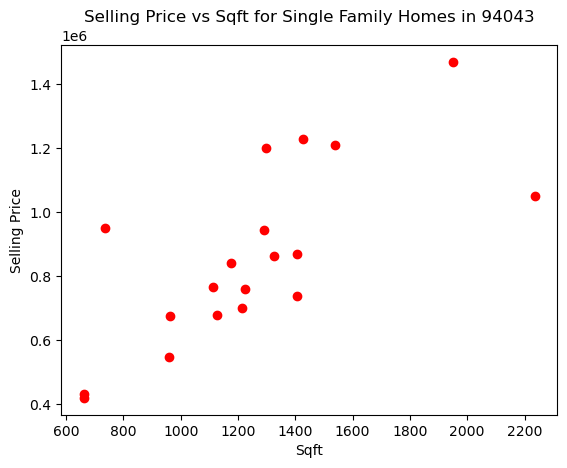

In [37]:
# Visualize the data of selling price vs sqft for single family homes in zip code 94043.
df_single_family_homes_94043 = df[df["Zip_code"] == 94043]
plt.scatter(x = df_single_family_homes_94043["sqft"], y = df_single_family_homes_94043["Selling_price"], color = 'red')
plt.xlabel("Sqft")
plt.ylabel("Selling Price")
plt.title("Selling Price vs Sqft for Single Family Homes in 94043")
#plt.savefig("sf_94043.png")

In [38]:
# Forming the X matrix and Y vector.
n_94043 = len(df_single_family_homes_94043["sqft"])
X_94043_sqft = df_single_family_homes_94043["sqft"].to_numpy().reshape((n_94043,1))
X_94043_ones = np.ones(n_94043).reshape((n_94043,1))
X_94043 = np.concatenate((X_94043_sqft,X_94043_ones),axis = 1)
print("Size of our data matrix : ", X_94043.shape, "\nX:\n", X_94043)
Y_94043 = df_single_family_homes_94043["Selling_price"].to_numpy().reshape((n_94043,1))
print("\nY:\n",Y_94043)

Size of our data matrix :  (19, 2) 
X:
 [[1.174e+03 1.000e+00]
 [9.620e+02 1.000e+00]
 [7.340e+02 1.000e+00]
 [2.236e+03 1.000e+00]
 [1.406e+03 1.000e+00]
 [1.290e+03 1.000e+00]
 [9.600e+02 1.000e+00]
 [1.326e+03 1.000e+00]
 [1.296e+03 1.000e+00]
 [1.113e+03 1.000e+00]
 [1.215e+03 1.000e+00]
 [1.426e+03 1.000e+00]
 [1.538e+03 1.000e+00]
 [6.620e+02 1.000e+00]
 [6.620e+02 1.000e+00]
 [1.407e+03 1.000e+00]
 [1.128e+03 1.000e+00]
 [1.950e+03 1.000e+00]
 [1.223e+03 1.000e+00]]

Y:
 [[ 842000]
 [ 675000]
 [ 950000]
 [1050000]
 [ 740000]
 [ 944000]
 [ 549000]
 [ 865000]
 [1200000]
 [ 767500]
 [ 700000]
 [1230000]
 [1210000]
 [ 420000]
 [ 433000]
 [ 870000]
 [ 680000]
 [1470000]
 [ 760000]]


In [39]:
# Calculating the maximum likelihood estimates for the regression coefficients beta_hat_sqft and alpha_hat.
xtx_inverse_xt_94043 = np.matmul(np.linalg.inv(np.matmul(np.transpose(X_94043), X_94043)),np.transpose(X_94043))
max_likelihood_coeffs_94043 = np.matmul(xtx_inverse_xt_94043,Y_94043)
print("Maximum Likelihood Estimate for Beta Square Foot = ", max_likelihood_coeffs_94043[0][0], 
      "\nMaximum Likelihood Estimate for Alpha = ", max_likelihood_coeffs_94043[1][0])

Maximum Likelihood Estimate for Beta Square Foot =  511.8954287498611 
Maximum Likelihood Estimate for Alpha =  222078.06185254175


Hence, we have the following estimates of the regression coefficients:

$$\begin{bmatrix}\hat{\beta}^{sqft} \\ \hat{\alpha}\end{bmatrix} = \begin{bmatrix} 511.8954287498611\\222078.06185254175 \end{bmatrix} \approx 
\begin{bmatrix} 511.8954\\2.221 \times 10^{5} \end{bmatrix}$$

In [41]:
# Calculating the unbiased estimator for the variance of the errors.
ub_estimator_94043 = np.dot(np.transpose(Y_94043 - np.matmul(X_94043, max_likelihood_coeffs_94043)), 
                            Y_94043 - np.matmul(X_94043, max_likelihood_coeffs_94043)) / (n_94043-2)
print("Unbiased Estimator for Variance of Errors = ", ub_estimator_94043[0][0])

Unbiased Estimator for Variance of Errors =  38984960775.22838


$$\therefore \hat{\sigma}_{UB}^{2} \approx 3.8985 \times 10^{10}$$

In [43]:
# Calculate the standard deviation of our maximum likelihood estimator regression coefficients.
sd_betasqft_94043 = np.sqrt(np.matmul(xtx_inverse_xt_94043[0], np.transpose(xtx_inverse_xt_94043[0])))*np.sqrt(ub_estimator_94043)
sd_alpha_94043 = np.sqrt(np.matmul(xtx_inverse_xt_94043[1], np.transpose(xtx_inverse_xt_94043[1])))*np.sqrt(ub_estimator_94043)
print("Standard Deviation for Beta Square Foot Estimate = ", sd_betasqft_94043[0][0], 
      "\nStandard Deviation Estimate for Alpha Estimate = ", sd_alpha_94043[0][0])

Standard Deviation for Beta Square Foot Estimate =  117.9824719863312 
Standard Deviation Estimate for Alpha Estimate =  154028.4698413626


$$
\begin{align*}
\therefore \begin{bmatrix}\sigma_{\hat{\beta}^{sqft}} \\ \sigma_{\hat{\alpha}}\end{bmatrix} &=
\begin{bmatrix} \sqrt{\vec{x}_{1}  \vec{x}_{1}^{T}} \cdot \sqrt{\hat{\sigma}_{UB}^{2}} \\ \sqrt{\vec{x}_{2} \vec{x}_{2}^{T}}\cdot \sqrt{\hat{\sigma}_{UB}^{2}}\end{bmatrix} \\
&\approx \begin{bmatrix} 117.982 \\ 1.54\times 10^{5}\end{bmatrix}
\end{align*}
$$

In [45]:
# Run the T-test for the coefficients to find their p-values
t_0_betasqft = (max_likelihood_coeffs_94043[0]/sd_betasqft_94043)[0][0]
t_0_alpha = (max_likelihood_coeffs_94043[1]/sd_alpha_94043)[0][0]
print("Test Statistic for Beta Square Foot Estimate = ", t_0_betasqft, 
      "\nTest Statistic for Alpha Estimate = ", t_0_alpha)

Test Statistic for Beta Square Foot Estimate =  4.338741341249118 
Test Statistic for Alpha Estimate =  1.4417987926599867


$$
\begin{align*}
\text{p-value for }\hat{\beta}^{sqft} &= P\left(T^{n-2} \ge \frac{\hat{\beta}^{sqft}}{\sigma_{\hat{\beta}^{sqft}}}\right) \\
&= P\left(T^{19-2} \ge 4.339\right) \\
&< 0.0005 \hspace{5mm} \text{ from T-table}  \\
\text{p-value for }\hat{\alpha} &= P\left(T^{n-2} \ge \frac{\hat{\alpha}}{\sigma_{\hat{\alpha}}}\right) \\
&= P\left(T^{19-2} \ge 1.442\right) \\
\implies 0.05 &< \text{p-value for }\hat{\alpha}< 0.1 \hspace{5mm} \text{ from T-table}
\end{align*}
$$

Since the p-values for $\hat{\alpha}$ are more than 0.05 we fail to reject the null hypothesis that is 
$$\begin{align*}H_{0}: \alpha &= 0 \end{align*}$$ 
at the 5% significance level.

However, since the p-value for $\hat{\beta}^{sqft}$ is less than 0.05, we reject the null hypothesis that is:
$$\begin{align*}H_{0}: \beta^{sqft} &= 0 \end{align*}$$ 

Hence, we conclude that square footage contributes to the selling price for single family homes located in 94043 but the intercept does not contribute.

In [47]:
model_94043 = smf.ols(formula= "Selling_price ~ sqft", data = df_single_family_homes_94043).fit()
print(model_94043.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     18.82
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           0.000446
Time:                        11:20:16   Log-Likelihood:                -257.57
No. Observations:                  19   AIC:                             519.1
Df Residuals:                      17   BIC:                             521.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.221e+05   1.54e+05      1.442      0.1

C:\Users\Juzar\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


Using the statistics package in Python, we are able to verify that the coefficients, standard deviation of the errors, test statistic and p-values that we calculated for our model are indeed correct.

# Including Other Parameters
We will include other parameters to our model to see if we can find any other parameters with a p-value less than 0.05 so that we can find a better model to predict the selling price of single family homes. We will be doing this analysis using the data from zip code $\textbf{30309}$.

In [84]:
print(df_single_family_homes_30309.columns)

Index(['House', 'Selling_price', 'Zip_code', 'Formal_Date', 'beds', 'bath',
       'House_type', 'sqft', 'year_built', 'last_sold_price ',
       'last_sold_date', 'Zestimate'],
      dtype='object')


1. Parameters used: Sqft + Beds

In [89]:
model_30309 = smf.ols(formula= "Selling_price ~ sqft+beds", data = df_single_family_homes_30309).fit()
print(model_30309.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_price   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     5.078
Date:                Mon, 02 Dec 2024   Prob (F-statistic):             0.0178
Time:                        11:33:19   Log-Likelihood:                -301.51
No. Observations:                  21   AIC:                             609.0
Df Residuals:                      18   BIC:                             612.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.666e+04   2.31e+05     -0.159      0.8

P-values for both square footage and number of beds is above 0.05, hence, at the 5% significance level, we cannot reject the null hypothesis that both coefficients are 0. Hence, this model is not useful.

2. Parameters used: Sqft + Year Built

In [98]:
model_30309 = smf.ols(formula= "Selling_price ~ sqft+C(year_built)", data = df_single_family_homes_30309).fit()
print(model_30309.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_price   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     23.48
Date:                Mon, 02 Dec 2024   Prob (F-statistic):             0.0121
Time:                        11:35:50   Log-Likelihood:                -254.77
No. Observations:                  21   AIC:                             545.5
Df Residuals:                       3   BIC:                             564.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -3.52

We observe that in general, the Year Built parameter has a p-value about 0.05 and square footage has a p-value of 0.025 which is less than 0.05. Hence, a model with square footage and the year the house was built would be a reasonable model.